In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
recent_date

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year= dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Query to retrieve the date and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values('date')

precip_df.dropna(subset=['precipitation'], inplace=True)

# Display the first few rows of the DataFrame
precip_df.head()



,date,precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70


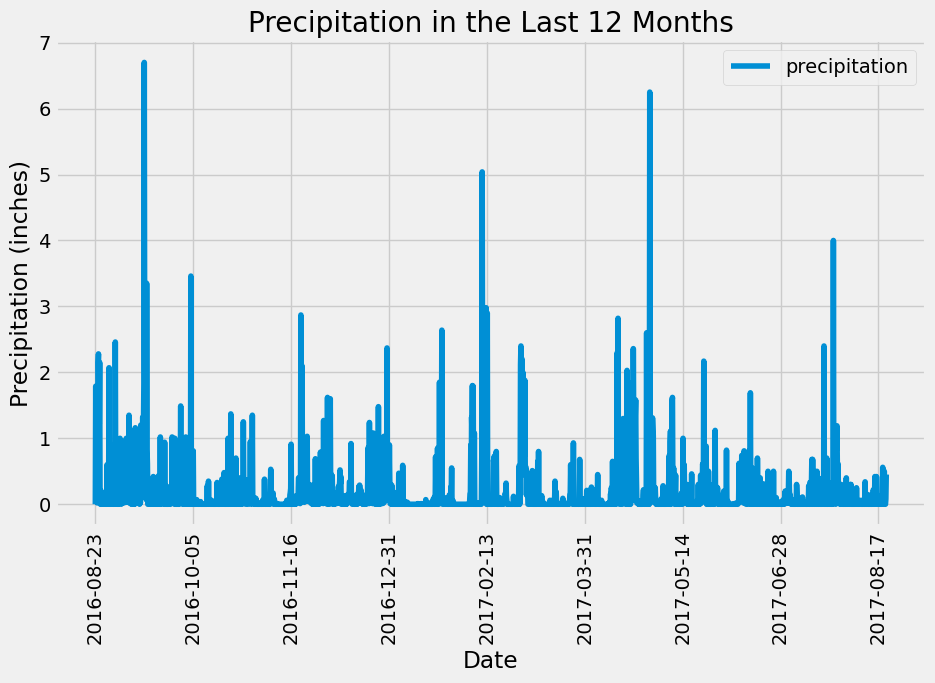

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precipitation', figsize=(10, 6), rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.show()


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(total_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Station with the most observations
most_active_station = station_activity[0][0]

temperature_stats = session.query(func.min(Measurement.tobs), 
                                  func.avg(Measurement.tobs), 
                                  func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

temperature_stats

[(54.0, 71.66378066378067, 85.0)]

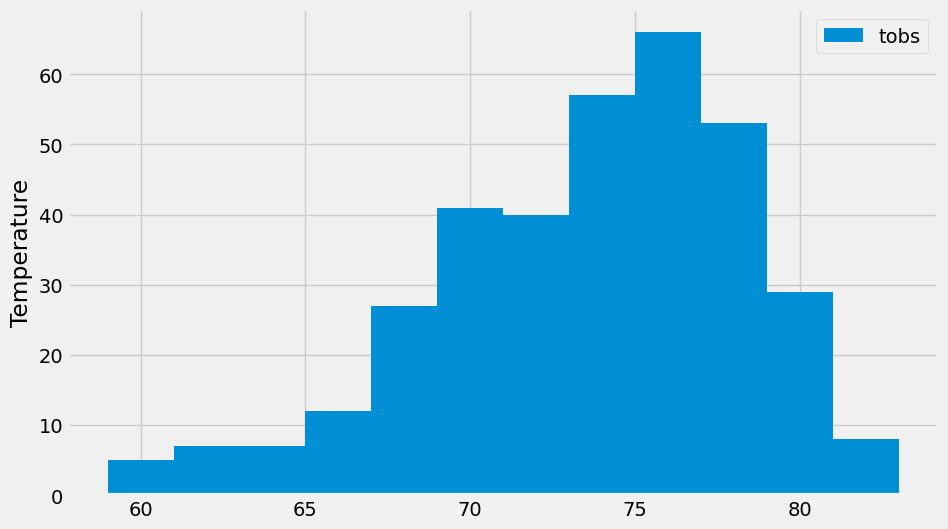

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year).all()

# Convert the query results to a DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])

# Plot the data as a histogram
tobs_df.plot.hist(bins=12, figsize=(10, 6))

# Set the y-axis label
plt.ylabel('Temperature')

# Show the plot
plt.show()

# Display the position of the ylabel


# Close Session

In [32]:
# Close Session
session.close()